In [1]:
#https://courses.cs.washington.edu/courses/cse528/07sp/izhi1.pdf

import matplotlib.pyplot as plt
class NeuronSpikingSimulation:
    '''
    Parameters in the model
    a: the time scale of the recovery variable. Smaller values result in slower recovery (typical value=0.02)
    b: the sensitivity of the recovery variable to the subthreshold fluctuations of the membrane potential (typical value=0.2)
    c: the after-spike reset value of the membrane potential caused by the fast high-threshold K+ conductances (typical value=-65)
    d: after-spike reset of the recovery variable caused by slow high-threshold Na+ and K+ conductances (typical value=2)
    I: Synaptic currents or injected dc-currents,  Increasing the strength of the injected dc-current increases the interspike frequency
    
    Variables in the model
    v_t: the membrane potential of the neuron at time t
    u_t: the membrane recovery variable,it provides negative feedback to v
    '''
    def __init__(self, a = 0.02, b = 0.2, c = -65, d = 2, I = 5, initial_v_t=-65):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.I = I
        self.v_t = initial_v_t
        self.u_t = self.b*self.v_t
   
    '''
    simulate the defined model of a single neuron
    to produce [T,V] where:
    T: is a time series in millisecond
    V: is a series of membrane potentials, V[i] is the membrane potential at the time interval T[i]
    '''
    def simulate(self):
        T = range(1000) #time series
        V = [self.v_t] #first membrane potential value, at t=0

        for t in T:
            if (t==0):
                continue
            
            # if the membrane potential is less than 30mV (before-spike stage), 
            # adjust the membrane potential v_t according to the two differential equations defined in Izhikevich's simple Model of Spiking Neurons
            if (self.v_t<30):
                self.v_t = self.v_t + 0.5*(0.04*self.v_t**2 + 5*self.v_t + 140 - self.u_t + self.I)
                self.v_t = self.v_t + 0.5*(0.04*self.v_t**2 + 5*self.v_t + 140 - self.u_t + self.I)

                self.u_t = self.u_t + self.a*(self.b*self.v_t - self.u_t)
            
            # if the membrane potential reach its apex at 30mv (after-spike stage), 
            # reset the membrane potential and recovery variable using parameters c and d
            else:
                self.v_t = self.c
                self.u_t = self.u_t+self.d

            # add the calculated membrane potential at the time interval t
            V.append(self.v_t)
               
        return [T, V]
    
    
    '''
    draw the spiking pattern
    times: is a time series e.g. [1...1000] - used as the x variable in the plot
    membrane_potentials: is a list of membrane potentials corresponding to times - used as the y variable in the plot
    '''
    def draw_spiking_pattern(times, membrane_potentials):
        fig, ax = plt.subplots()
        ax.plot(times, membrane_potentials)
        ax.set(xlim=(0, 1000), ylim=(-80, 50))

        plt.gcf().set_size_inches(18, 5)
        plt.show()

    
    # class method, draw and compare different model spiking patterns 
    def compare_patterns(models, compare_against='a'):
        fig, axs = plt.subplots(ncols=2, 
                                nrows=int((len(models)+1)/2), 
                                sharex=True, 
                                sharey=True, 
                                figsize= [15, 10],
                                gridspec_kw = {'wspace': 0.05}
                                )
        fig.text(0.5, 0.04, 'At time t(ms)', ha='center')
        fig.text(0.04, 0.5, 'Membrane Potential, variable v (mV)', va='center', rotation='vertical')
        
        for i in range(len(models)):
            model = models[i]
            x = int(i/2)
            y = int(i%2)
            print(axs)
            axs[x,y].plot(model[0], model[1])
            axs[x,y].set(xlim=(0, 1000), 
                         ylim=(-80, 30), 
                         title=f'{compare_against}={model[2]}',
                        )
            
        plt.show()

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'a=0.02'}> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'a=0.02'}>
  <AxesSubplot:title={'center':'a=0.04'}>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'a=0.02'}>
  <AxesSubplot:title={'center':'a=0.04'}>]
 [<AxesSubplot:title={'center':'a=0.06'}> <AxesSubplot:>]]


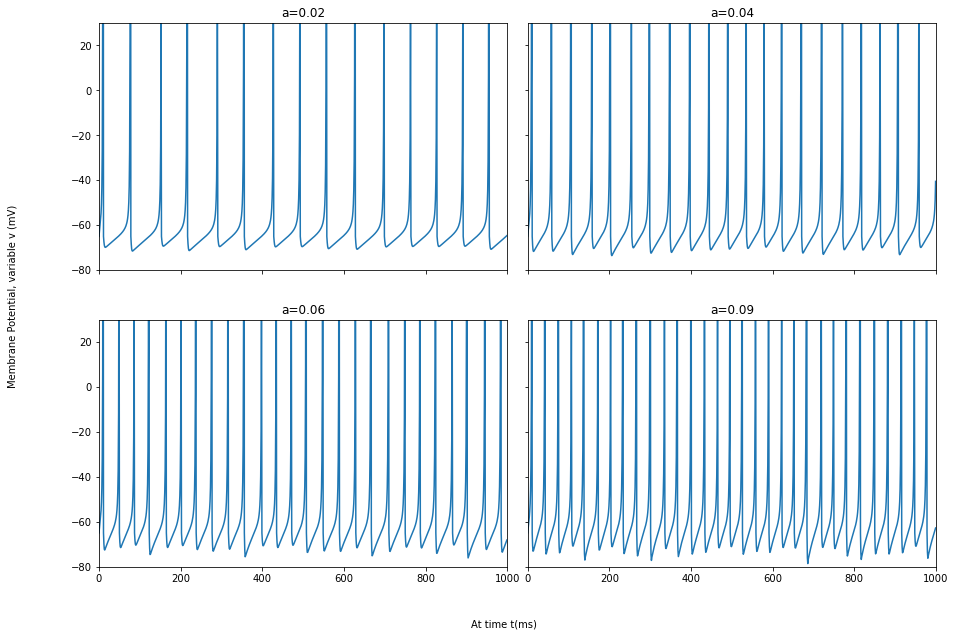

In [2]:
# when vary the value of a 
# a is the time scale of the recovery variable. Smaller values result in slower recovery
model_1 = NeuronSpikingSimulation()

# 
model_2 = NeuronSpikingSimulation(a=0.04)
model_3 = NeuronSpikingSimulation(a=0.06)
model_4 = NeuronSpikingSimulation(a=0.09)

models = [[*model_1.simulate(), model_1.a], 
          [*model_2.simulate(), model_2.a], 
          [*model_3.simulate(), model_3.a],
          [*model_4.simulate(), model_4.a]
         ]
NeuronSpikingSimulation.compare_patterns(models)

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'b=0.2'}> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'b=0.2'}>
  <AxesSubplot:title={'center':'b=0.25'}>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'b=0.2'}>
  <AxesSubplot:title={'center':'b=0.25'}>]
 [<AxesSubplot:title={'center':'b=0.3'}> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'b=0.2'}>
  <AxesSubplot:title={'center':'b=0.25'}>]
 [<AxesSubplot:title={'center':'b=0.3'}>
  <AxesSubplot:title={'center':'b=0.35'}>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'b=0.2'}>
  <AxesSubplot:title={'center':'b=0.25'}>]

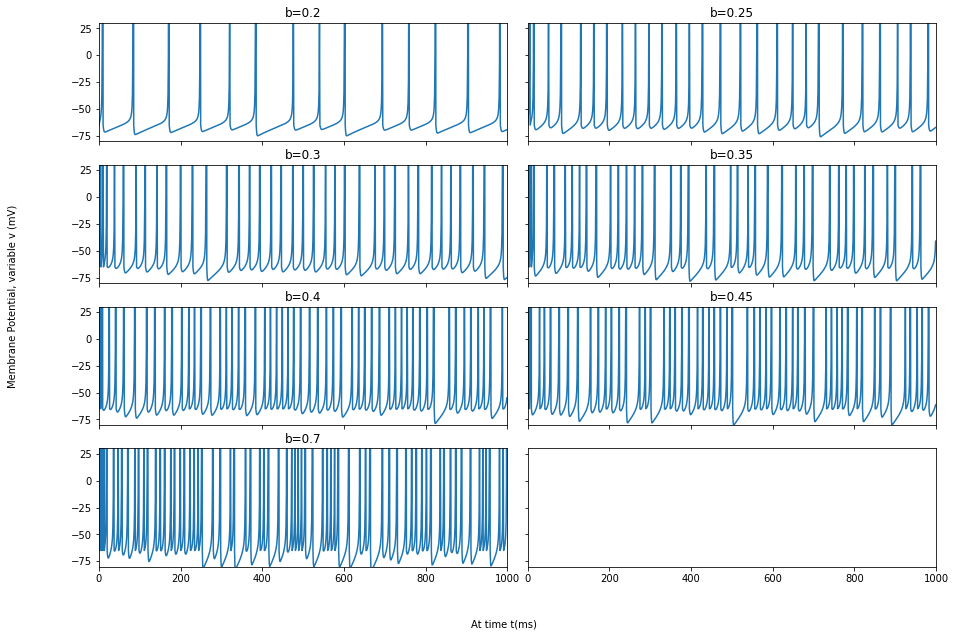

In [3]:
# when vary the value of b 
# the sensitivity of the recovery variable to the subthreshold fluctuations of the membrane potential
model_1 = NeuronSpikingSimulation()
model_2 = NeuronSpikingSimulation(b=0.25)
model_3 = NeuronSpikingSimulation(b=0.3)
model_4 = NeuronSpikingSimulation(b=0.35)
model_5 = NeuronSpikingSimulation(b=0.4)
model_6 = NeuronSpikingSimulation(b=0.45)
model_7 = NeuronSpikingSimulation(b=0.7)


models = [[*model_1.simulate(), model_1.b],
          [*model_2.simulate(), model_2.b],
          [*model_3.simulate(), model_3.b],
          [*model_4.simulate(), model_4.b],
          [*model_5.simulate(), model_5.b],
          [*model_6.simulate(), model_6.b],
          [*model_7.simulate(), model_7.b]
         ]
NeuronSpikingSimulation.compare_patterns(models, 'b')

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'d=2'}> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'d=2'}>
  <AxesSubplot:title={'center':'d=4'}>]
 [<AxesSubplot:> <AxesSubplot:>]]
[[<AxesSubplot:title={'center':'d=2'}>
  <AxesSubplot:title={'center':'d=4'}>]
 [<AxesSubplot:title={'center':'d=6'}> <AxesSubplot:>]]


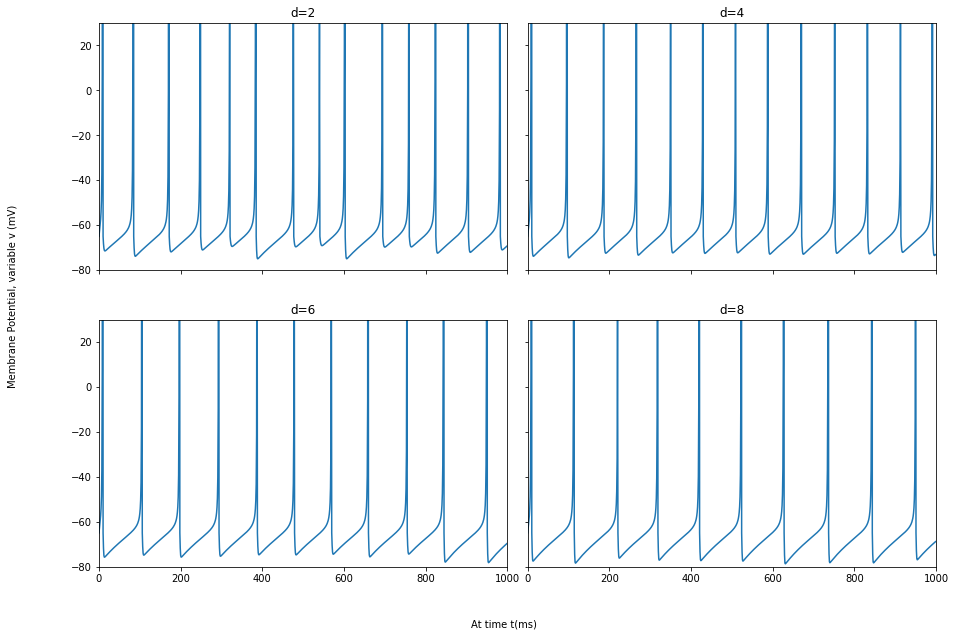

In [4]:
# when vary the value of d
# d: after-spike reset of the recovery variable caused by slow high-threshold Na+ and K+ conductances (typical value=2)
model_1 = NeuronSpikingSimulation(d=2)
model_2 = NeuronSpikingSimulation(d=4)
model_3 = NeuronSpikingSimulation(d=6)
model_4 = NeuronSpikingSimulation(d=8)


models = [
          [*model_1.simulate(), model_1.d],
          [*model_2.simulate(), model_2.d],
          [*model_3.simulate(), model_3.d],
          [*model_4.simulate(), model_4.d],
         ]
NeuronSpikingSimulation.compare_patterns(models, 'd')

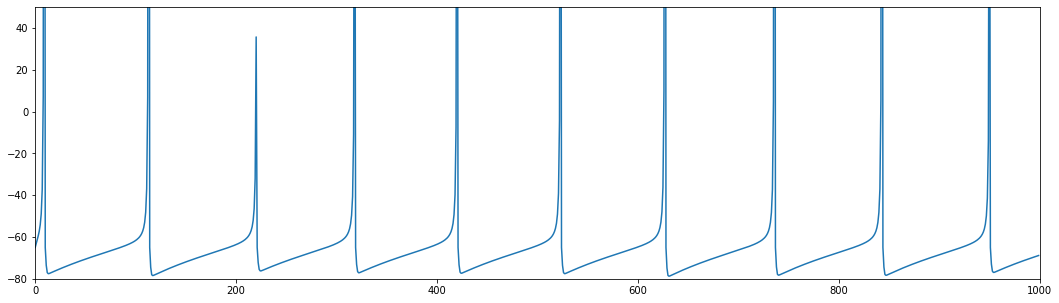

In [5]:
# RS (regular spike)
model = NeuronSpikingSimulation(c=-65, d=8).simulate()
NeuronSpikingSimulation.draw_spiking_pattern(model[0], model[1])

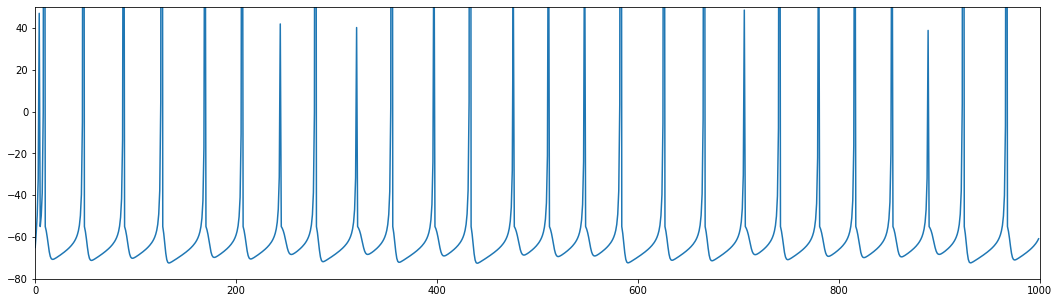

In [6]:
# IB (intrinsically bursting: a stereotypical burst of spikes followed by repetitive single spikes)
model = NeuronSpikingSimulation(a=0.02, b=0.2, c=-55, d=4, I=10).simulate()
NeuronSpikingSimulation.draw_spiking_pattern(model[0], model[1])